In [1]:
import ExtractContent

Input source directory: 
d
The source directory d does not exist, exit...


SystemExit: 

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
ExtractContent.ExtractBodyFromDir ("TRAINING", "TRAINING_DATA" ) 

In [2]:
import os
import string
import re
import numpy as np
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "spam_classification"
image_path = "images/"+CHAPTER_ID
if not os.path.isdir(image_path):
    os.makedirs(image_path)
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [4]:
import pandas as pd
import io
import numpy as np
labels = []
files = []
texts = []
unicode_errors = []
data = pd.read_csv('SPAMTrainLabel.txt', header = None,names=["label"])
for i in range(0,len(data["label"])):
    context = data["label"][i].split(" ")
    labels.append(context[0])
    files.append(context[1])
# Fix the indexes of test and random data

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(labels, labels):
    train_labels = [int(labels[i]) for i in train_index]
    train_files = [files[i] for i in train_index]
    test_labels = [int(labels[i]) for i in test_index]
    test_files = [files[i] for i in test_index]
def load_files(files,labels):
    direct = "TRAINING_DATA/"
    texts = []
    unicode_errors = []
    n = len(files)
    #n = 100
    for i in range(0, n):
        if i % 500 ==0:
            buf = "Start processing the %d'th file: %s" % (i, files[i])
            print(buf)

        x_file = io.open(os.path.join(direct, files[i]), "rb")  

        with x_file as fhdl:
            text = fhdl.read()
            fhdl.close()
            try:
                texts.append(text.replace("\n", ""))
                unicode_errors.append(0)
            except :
                text = unicode(text, errors='replace')
                texts.append(text.replace("\n", ""))
                unicode_errors.append(1)
    texts.append(unicode_errors)
    return texts
train_texts = load_files(train_files,train_labels)
test_texts = load_files(test_files,test_labels)   
train_unicode_errors = train_texts.pop()
test_unicode_errors = test_texts.pop()      
train_X = pd.DataFrame({'texts':train_texts,'unicode_errors':train_unicode_errors})
test_X = pd.DataFrame({'texts':test_texts,'unicode_errors':test_unicode_errors})




Start processing the 0'th file: TRAIN_03154.eml
Start processing the 500'th file: TRAIN_02337.eml
Start processing the 1000'th file: TRAIN_00136.eml
Start processing the 1500'th file: TRAIN_02811.eml
Start processing the 2000'th file: TRAIN_03878.eml
Start processing the 2500'th file: TRAIN_03685.eml
Start processing the 3000'th file: TRAIN_04137.eml
Start processing the 0'th file: TRAIN_01409.eml
Start processing the 500'th file: TRAIN_03000.eml


In [5]:
print("The proportion of spam email in training set and test set are %.3f and %.3f. \n" % (np.mean([int(i) for i in train_labels]), np.mean([int(i) for i in test_labels])))


The proportion of spam email in training set and test set are 0.682 and 0.681. 



In [317]:
charlist  = [' '.encode('utf-8')]+ [chr(i) for i in range(97,123)]
print(charlist)
all_grams = []
for i in charlist:
    for j in charlist:
        for k in charlist:
            all_grams.append((i+j+k).replace(' ','').encode('utf-8'))

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [321]:
all_grams = list(set(all_grams))
len(all_grams)

18279

In [329]:
def add_char(str_list,char_list):
    result = []
    for string in str_list:
        for char in char_list:
            result.append(string+char)
    return str_list + result
    
def construct_gram(n_gram,char_list):
    if n_gram ==1 :
        return char_list
    else:
        return  add_char(construct_gram(n_gram -1, char_list),char_list)

In [328]:
gram_list = construct_gram(2,[chr(i) for i in range(97,123)])
gram_list
len(gram_list)

702

In [19]:
class TextScreen:
    import re
    def __init__(self):
        self.http = ''
        self.wordDict = {}
        self.gramDict = {}
        self.numCounter = 0
        self.text = ""
        self.n_char = None
    def getText(self, text, n_char):
        self.text = text
        self.n_char = n_char
    def checkHttp(self):   
        regexp = "http:.*?\/"
        try:
            found = re.search(regexp, self.text)
            self.http = found.group(0)
            text = re.sub(regexp, "", self.text)
            self.text = text
        except AttributeError:
                # AAA, ZZZ not found in the original string
            found = ''
    def extractText(self):
        #self.text = re.sub("\<.*?\>","", self.text)
        words = " ".join(re.findall("[a-zA-Z]+", self.text))
        wl = words.split(" ");
        wordDict = self.wordDict
        gramDict = self.gramDict
        for w in wl:
            if w in wordDict.keys():
                wordDict[w] +=1
            else:
                wordDict[w] = 1
            n_char = self.n_char
            n_gram = max(1,len(w)-n_char+1)
            for k in range(0, n_gram):
                gram_i = w.lower()[k: k+n_char]
                if gram_i in gramDict.keys():
                    gramDict[gram_i] +=1
                else:
                    gramDict[gram_i] = 1

            self.wordDict = wordDict
            self.gramDict = gramDict
            
            
        
    def countNum(self):
        numbers = re.findall("[0-9]+", self.text)
        self.numCounter += len(numbers)
        
        


In [331]:
def createFeatures(X, N_CHAR):
    import collections as cl
    texts = X['texts']
    unicode_errors = X['unicode_errors']
    # unicode_errors = texts.pop()
    all_text = []
    all_words = cl.Counter()
    all_grams = cl.Counter()
    direct = 'TRAINING_DATA'
    n = len(X)
    #n = 100
    for i in range(0, n):
        if i % 100 ==0:
            buf = "Start processing the %d'th file: %s" % (i, files[i])
            print(buf)
        text_i = TextScreen()
        text_i.getText(texts[i],N_CHAR)
        text_i.checkHttp();
        text_i.extractText();
        text_i.countNum();
        all_text.append(text_i)
        all_words += cl.Counter(text_i.wordDict)
        all_grams += cl.Counter(text_i.gramDict)
    all_grams.pop('', None)    
    #list_grams = list(all_grams)
    list_grams = construct_gram(N_CHAR,[chr(i) for i in range(97,123)])
    list_grams.sort()

    values = list(range(0,len(list_grams)))
    grams_pos = {list_grams[i]: values[i] for i in range(0,len(list_grams))}
    pos_matrix = np.zeros((n,len(list_grams)+3))
    # add unicode_erros, number of numbers, and whether http exists 
    for i in range(0, n):
        text_i = all_text[i]
        grams_i_dic = text_i.gramDict
        grams_i_dic.pop('', None)
        for key in grams_i_dic.keys():
            pos_j = grams_pos[key]
            pos_matrix[i,pos_j] = grams_i_dic[key]
            pos_matrix[i,-1] = text_i.numCounter
            pos_matrix[i,-2] = len(text_i.http)>0
            pos_matrix[i,-3] = unicode_errors[i]
    return (pos_matrix, list_grams)


#Construct a new disctionary that uses position index as value

list_grams = list(all_grams)
list_grams.sort()
values = list(range(0,len(list_grams)))
grams_pos = {list_grams[i]: values[i] for i in range(0,len(list_grams))}


pos_matrix = np.zeros((n,len(list_grams)+3))
# add number of numbers, whether http exists and label
for i in range(0, n):
    text_i = all_text[i]
    grams_i_dic = text_i.gramDict
    grams_i_dic.pop('', None)
    for key in grams_i_dic.keys():
        pos_j = grams_pos[key]
        grams_pos[i,pos_j] = grams_i_dic[key]
    pos_matrix[i,-1] = text_i.label
    pos_matrix[i,-2] = text_i.numCounter
    pos_matrix[i,-3] = len(text_i.http)>0

In [259]:
from sklearn.base import BaseEstimator, TransformerMixin


class PickGramCreateFeature(BaseEstimator, TransformerMixin):
    def __init__(self, n_char = 3): # no *args or **kargs
        self.n_char = n_char
        self.unicode_errors = None
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        return createFeatures(X,self.n_char)


In [162]:

pick_feature = PickGramCreateFeature(n_char = 3)
X_train= pick_feature.transform(train_X.iloc[:100],train_labels[:100])


Start processing the 0'th file: TRAIN_00000.eml


In [39]:
y_train = [int(i) for i in train_labels]
features

[u'a',
 u'aa',
 u'aaa',
 u'aab',
 u'aac',
 u'aad',
 u'aae',
 u'aaf',
 u'aag',
 u'aah',
 u'aai',
 u'aaj',
 u'aak',
 u'aal',
 u'aam',
 u'aan',
 u'aao',
 u'aap',
 u'aaq',
 u'aar',
 u'aas',
 u'aat',
 u'aau',
 u'aav',
 u'aaw',
 u'aax',
 u'aay',
 u'aaz',
 u'ab',
 u'aba',
 u'abb',
 u'abc',
 u'abd',
 u'abe',
 u'abf',
 u'abg',
 u'abh',
 u'abi',
 u'abj',
 u'abk',
 u'abl',
 u'abm',
 u'abn',
 u'abo',
 u'abp',
 u'abq',
 u'abr',
 u'abs',
 u'abt',
 u'abu',
 u'abv',
 u'abw',
 u'abx',
 u'aby',
 u'abz',
 u'ac',
 u'aca',
 u'acb',
 u'acc',
 u'acd',
 u'ace',
 u'acf',
 u'acg',
 u'ach',
 u'aci',
 u'acj',
 u'ack',
 u'acl',
 u'acm',
 u'acn',
 u'aco',
 u'acp',
 u'acq',
 u'acr',
 u'acs',
 u'act',
 u'acu',
 u'acv',
 u'acw',
 u'acx',
 u'acy',
 u'acz',
 u'ad',
 u'ada',
 u'adb',
 u'adc',
 u'add',
 u'ade',
 u'adf',
 u'adg',
 u'adh',
 u'adi',
 u'adj',
 u'adk',
 u'adl',
 u'adm',
 u'adn',
 u'ado',
 u'adp',
 u'adq',
 u'adr',
 u'ads',
 u'adt',
 u'adu',
 u'adv',
 u'adw',
 u'adx',
 u'ady',
 u'adz',
 u'ae',
 u'aea',
 u'aeb',

In [163]:
np.shape(X_train)

(100, 7687)

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.77835498,  0.35299219,  0.68169991])

In [42]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
def reportResult(y_train,y_train_pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import precision_score, recall_score


    print("The confusion matrix is \n")
    print( confusion_matrix(y_train, y_train_pred))
    print (" The precision score is %.3f and the recall score is %.3f.\n" %(precision_score(y_train, y_train_pred),recall_score(y_train, y_train_pred)))

reportResult(y_train,y_train_pred)



The confusion matrix is 

[[ 544  558]
 [ 811 1548]]
 The precision score is 0.735 and the recall score is 0.656.



In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")


Saving figure precision_recall_vs_threshold_plot


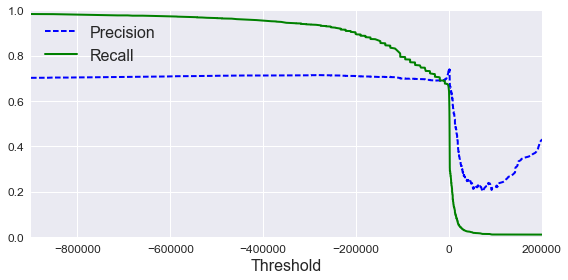

In [45]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-900000, 200000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

Saving figure precision_vs_recall_plot


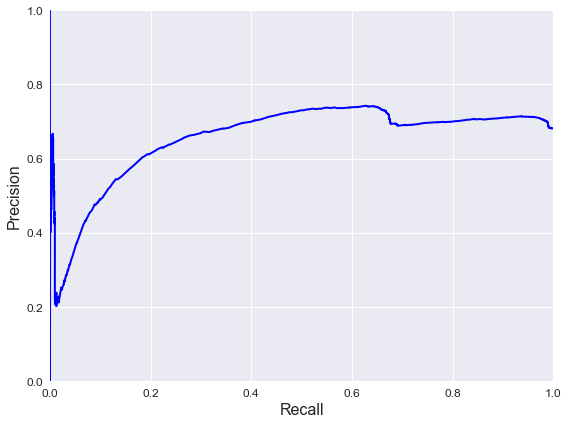

In [46]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [48]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)
reportResult(y_train,y_train_pred_forest)

The confusion matrix is 

[[ 507  595]
 [ 197 2162]]
 The precision score is 0.784 and the recall score is 0.916.



In [49]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.77575758,  0.75975716,  0.77797051])

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 50, 100], 'max_features': [100, 200, 1000]},
  ]

forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring="accuracy",
                           n_jobs=4, verbose=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_features=100, n_estimators=30 ...............................
[CV] max_features=100, n_estimators=30 ...............................
[CV] max_features=100, n_estimators=30 ...............................
[CV] max_features=100, n_estimators=50 ...............................
[CV]  max_features=100, n_estimators=30, score=0.782684, total=  16.7s
[CV] max_features=100, n_estimators=50 ...............................
[CV]  max_features=100, n_estimators=30, score=0.761492, total=  16.8s
[CV] max_features=100, n_estimators=50 ...............................
[CV]  max_features=100, n_estimators=30, score=0.776236, total=  17.4s
[CV] max_features=100, n_estimators=100 ..............................
[CV]  max_features=100, n_estimators=50, score=0.779221, total=  27.3s
[CV] max_features=100, n_estimators=100 ..............................
[CV]  max_features=100, n_estimators=50, score=0.766696, total=  26.8s
[CV] max_features

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.5min


[CV]  max_features=1000, n_estimators=30, score=0.762359, total=  16.8s
[CV] max_features=1000, n_estimators=50 ..............................
[CV]  max_features=200, n_estimators=100, score=0.764961, total=  51.9s
[CV] max_features=1000, n_estimators=50 ..............................
[CV]  max_features=200, n_estimators=100, score=0.771899, total=  51.8s
[CV] max_features=1000, n_estimators=50 ..............................
[CV]  max_features=1000, n_estimators=30, score=0.777103, total=  16.7s
[CV] max_features=1000, n_estimators=100 .............................
[CV]  max_features=1000, n_estimators=50, score=0.779221, total=  27.1s
[CV] max_features=1000, n_estimators=100 .............................
[CV]  max_features=1000, n_estimators=50, score=0.766696, total=  27.0s
[CV] max_features=1000, n_estimators=100 .............................
[CV]  max_features=1000, n_estimators=50, score=0.777103, total=  26.7s
[CV]  max_features=1000, n_estimators=100, score=0.778355, total=  47.

[Parallel(n_jobs=4)]: Done  27 out of  27 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  27 out of  27 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{u'n_estimators': [30, 50, 100], u'max_features': [100, 200, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'accuracy', verbose=4)

# Now we use pipeline to pick the best model

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
grid_search.best_params_

0.773475874025 {u'max_features': 100, u'n_estimators': 30}
0.774053741693 {u'max_features': 100, u'n_estimators': 50}
0.77174227102 {u'max_features': 100, u'n_estimators': 100}
0.773475874025 {u'max_features': 200, u'n_estimators': 30}
0.774053741693 {u'max_features': 200, u'n_estimators': 50}
0.77174227102 {u'max_features': 200, u'n_estimators': 100}
0.773764807859 {u'max_features': 1000, u'n_estimators': 30}
0.774342675527 {u'max_features': 1000, u'n_estimators': 50}
0.77174227102 {u'max_features': 1000, u'n_estimators': 100}


{u'max_features': 1000, u'n_estimators': 50}

In [181]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_num = True, add_http = True): # no *args or **kargs
        self.add_num = add_num
        self.add_http = add_http
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        http = X[:,-2]
        num = X[:,-1]
        pos = X[:,:-2]
        if not self.add_num:
            if not self.add_http:
                return pos
            else:
                return np.c_[pos,http]
        else:
            if not self.add_http:
                return np.c_[pos,num]
            else:
                return np.c_[pos,http,num]



In [81]:
attr_adder = CombinedAttributesAdder(add_num=False, add_http = False)
X_train_pure = attr_adder.fit_transform(X_train)
np.shape(X_train_pure)
std_scaler = StandardScaler()
std_scaler.fit_transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ..., -0.30070281,
         0.45193468, -0.14876389],
       [ 0.        ,  0.        ,  0.        , ...,  3.32554258,
         0.45193468, -0.13114044],
       [ 0.        ,  0.        ,  0.        , ..., -0.30070281,
         0.45193468, -0.18694801],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  3.32554258,
         0.45193468, -0.15170113],
       [ 0.        ,  0.        ,  0.        , ..., -0.30070281,
         0.45193468, -0.17519905],
       [ 0.        ,  0.        ,  0.        , ..., -0.30070281,
         0.45193468, -0.16345009]])

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 50], 'max_features': [200, 1000]},
  ]

forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring="accuracy",
                           n_jobs=4, verbose=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_features=200, n_estimators=30 ...............................
[CV] max_features=200, n_estimators=30 ...............................
[CV] max_features=200, n_estimators=30 ...............................
[CV] max_features=200, n_estimators=50 ...............................
[CV]  max_features=200, n_estimators=30, score=0.782684, total=  16.8s
[CV] max_features=200, n_estimators=50 ...............................
[CV]  max_features=200, n_estimators=30, score=0.761492, total=  17.3s
[CV] max_features=200, n_estimators=50 ...............................
[CV]  max_features=200, n_estimators=30, score=0.776236, total=  17.3s
[CV] max_features=1000, n_estimators=30 ..............................
[CV]  max_features=200, n_estimators=50, score=0.779221, total=  27.9s
[CV] max_features=1000, n_estimators=30 ..............................
[CV]  max_features=1000, n_estimators=30, score=0.781818, total=  17.8s
[CV] max_feature

[Parallel(n_jobs=4)]: Done   9 out of  12 | elapsed:   57.4s remaining:   19.1s


[CV]  max_features=1000, n_estimators=50, score=0.779221, total=  24.3s
[CV]  max_features=1000, n_estimators=50, score=0.766696, total=  23.7s
[CV]  max_features=1000, n_estimators=50, score=0.777103, total=  23.7s


[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{u'n_estimators': [30, 50], u'max_features': [200, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'accuracy', verbose=4)

In [84]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
grid_search.best_params_

0.773475874025 {u'max_features': 200, u'n_estimators': 30}
0.774053741693 {u'max_features': 200, u'n_estimators': 50}
0.773764807859 {u'max_features': 1000, u'n_estimators': 30}
0.774342675527 {u'max_features': 1000, u'n_estimators': 50}


{u'max_features': 1000, u'n_estimators': 50}

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
prepare_pipeline = Pipeline([
        ('gram_pick', PickGramCreateFeature()),
       ])
std_pipeline   = Pipeline([ ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())])
prepare_pipeline.set_params(gram_pick__n_char=2) 

Pipeline(steps=[(u'gram_pick', PickGramCreateFeature(n_char=2))])

In [338]:

X_train, features = prepare_pipeline.fit_transform(train_X)
X_train_std = std_pipeline.fit_transform(X_train)

Start processing the 0'th file: TRAIN_00000.eml
Start processing the 100'th file: TRAIN_00100.eml
Start processing the 200'th file: TRAIN_00200.eml
Start processing the 300'th file: TRAIN_00300.eml
Start processing the 400'th file: TRAIN_00400.eml
Start processing the 500'th file: TRAIN_00500.eml
Start processing the 600'th file: TRAIN_00600.eml
Start processing the 700'th file: TRAIN_00700.eml
Start processing the 800'th file: TRAIN_00800.eml
Start processing the 900'th file: TRAIN_00900.eml
Start processing the 1000'th file: TRAIN_01000.eml
Start processing the 1100'th file: TRAIN_01100.eml
Start processing the 1200'th file: TRAIN_01200.eml
Start processing the 1300'th file: TRAIN_01300.eml
Start processing the 1400'th file: TRAIN_01400.eml
Start processing the 1500'th file: TRAIN_01500.eml
Start processing the 1600'th file: TRAIN_01600.eml
Start processing the 1700'th file: TRAIN_01700.eml
Start processing the 1800'th file: TRAIN_01800.eml
Start processing the 1900'th file: TRAIN_01

In [335]:
np.shape(X_train)

(100, 705)

In [354]:
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV

def my_custom_score_func(y, y_pred, p=1/2):
    from sklearn.metrics import precision_score, recall_score
    return p*precision_score(y,y_pred) + (1-p) * recall_score(y,y_pred)
my_score = make_scorer(my_custom_score_func, greater_is_better=True, p=0.9)
# Generate sample data
forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring=my_score,
                           n_jobs=4, verbose=4)
grid_search.fit(X_train_std, y_train)



Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_features=auto, n_estimators=30 ..............................
[CV] max_features=auto, n_estimators=30 ..............................
[CV] max_features=auto, n_estimators=30 ..............................
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=30, score=0.929981, total=   0.4s
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=30, score=0.931727, total=   0.4s
[CV]  max_features=auto, n_estimators=30, score=0.935541, total=   0.4s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] max_features=log2, n_estimators=30 ..............................
[CV]  max_features=auto, n_estimators=50, score=0.932188, total=   0.5s
[CV] max_features=log2, n_estimators=30 ..............................
[CV]  max_features=log2, n_estimators=30, score=0.924468, total=   0.3s
[CV] max_fea

[Parallel(n_jobs=4)]: Done  16 out of  18 | elapsed:    3.0s remaining:    0.4s


[CV]  max_features=0.1, n_estimators=50, score=0.954247, total=   1.0s
[CV]  max_features=0.1, n_estimators=50, score=0.947985, total=   0.9s


[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    3.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{u'n_estimators': [30, 50], u'max_features': [u'auto', u'log2', 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(my_custom_score_func, p=0.9), verbose=4)

In [355]:
Cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
grid_search.best_params_

0.936434556487 {u'max_features': u'auto', u'n_estimators': 30}
0.939901762496 {u'max_features': u'auto', u'n_estimators': 50}
0.929500144467 {u'max_features': u'log2', u'n_estimators': 30}
0.930366945969 {u'max_features': u'log2', u'n_estimators': 50}
0.952903785033 {u'max_features': 0.1, u'n_estimators': 30}
0.951170182028 {u'max_features': 0.1, u'n_estimators': 50}


{u'max_features': 0.1, u'n_estimators': 30}

In [357]:

y_train_pred = grid_search.predict(X_train_std)
reportResult(y_train,y_train_pred)

The confusion matrix is 

[[1101    1]
 [   0 2359]]
 The precision score is 1.000 and the recall score is 1.000.



In [358]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 50], 'max_features': [0.5,0.2, 0.1]},
  ]

forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring="accuracy",
                           n_jobs=4, verbose=4)
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_features=0.5, n_estimators=30 ...............................
[CV] max_features=0.5, n_estimators=30 ...............................
[CV] max_features=0.5, n_estimators=30 ...............................
[CV] max_features=0.5, n_estimators=50 ...............................
[CV]  max_features=0.5, n_estimators=30, score=0.954033, total=   2.4s
[CV] max_features=0.5, n_estimators=50 ...............................
[CV]  max_features=0.5, n_estimators=30, score=0.948918, total=   2.5s
[CV] max_features=0.5, n_estimators=50 ...............................
[CV]  max_features=0.5, n_estimators=30, score=0.949696, total=   2.5s
[CV] max_features=0.2, n_estimators=30 ...............................
[CV]  max_features=0.2, n_estimators=30, score=0.954978, total=   1.0s
[CV] max_features=0.2, n_estimators=30 ...............................
[CV]  max_features=0.5, n_estimators=50, score=0.948052, total=   4.2s
[CV] max_features

[Parallel(n_jobs=4)]: Done  16 out of  18 | elapsed:    9.0s remaining:    1.1s


[CV]  max_features=0.1, n_estimators=50, score=0.949696, total=   0.9s


[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    9.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{u'n_estimators': [30, 50], u'max_features': [0.5, 0.2, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'accuracy', verbose=4)

In [359]:
Cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
grid_search.best_params_

0.936434556487 {u'max_features': u'auto', u'n_estimators': 30}
0.939901762496 {u'max_features': u'auto', u'n_estimators': 50}
0.929500144467 {u'max_features': u'log2', u'n_estimators': 30}
0.930366945969 {u'max_features': u'log2', u'n_estimators': 50}
0.952903785033 {u'max_features': 0.1, u'n_estimators': 30}
0.951170182028 {u'max_features': 0.1, u'n_estimators': 50}


{u'max_features': 0.2, u'n_estimators': 50}

In [337]:
feature_importances = grid_search.best_estimator_.feature_importances_
np.shape(X_test)

(866, 705)

In [341]:
len(feature_importances)

705

In [342]:
extra_attribs = ["unicode_errors", "number", "http"]
attributes = features + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.038388869647009917, 'wr'),
 (0.037169438234427275, 'mg'),
 (0.034597815575564343, 'ht'),
 (0.032383026489121274, 'td'),
 (0.029998823204371416, 'i'),
 (0.029484123980002032, 'yl'),
 (0.028161178293531219, 'dt'),
 (0.026968438421260909, 'dy'),
 (0.026093048852630786, 'yo'),
 (0.017579980425308804, 'ur'),
 (0.015665608529244788, 'od'),
 (0.014254523390441587, 'tm'),
 (0.014098289440786496, u'http'),
 (0.013538781781789858, 'yp'),
 (0.013380771557549785, 'br'),
 (0.013205172782355426, 'rg'),
 (0.013052634336110362, 'ml'),
 (0.012281561778175333, 'ze'),
 (0.012245116576795214, 'iz'),
 (0.012032722980522013, 'nt'),
 (0.011406646203204555, 'ce'),
 (0.011300207411390621, 'ww'),
 (0.0089868925907029915, 'is'),
 (0.0089331076956496221, 'bg'),
 (0.0088798924290729563, 'wh'),
 (0.0082521357536000442, 'hr'),
 (0.0078047345936455041, 'th'),
 (0.0077918763175743302, 'om'),
 (0.0077514850295344389, 'ou'),
 (0.0074684604770287495, 'gn'),
 (0.0066742095457823824, 'fe'),
 (0.0062147342366052107, 'at

In [336]:

X_test, features_test = prepare_pipeline.fit_transform(test_X)
X_test_std = std_pipeline.fit_transform(X_test)

Start processing the 0'th file: TRAIN_00000.eml
Start processing the 100'th file: TRAIN_00100.eml
Start processing the 200'th file: TRAIN_00200.eml
Start processing the 300'th file: TRAIN_00300.eml
Start processing the 400'th file: TRAIN_00400.eml
Start processing the 500'th file: TRAIN_00500.eml
Start processing the 600'th file: TRAIN_00600.eml
Start processing the 700'th file: TRAIN_00700.eml
Start processing the 800'th file: TRAIN_00800.eml


In [274]:
forest_clf2 = RandomForestClassifier(random_state=42, n_estimators= 50, max_features = 0.1)

In [360]:
y_test = [int(i) for i in test_labels]
y_test_pred = grid_search.predict(X_test_std)
reportResult(y_test,y_test_pred)

The confusion matrix is 

[[233  43]
 [  5 585]]
 The precision score is 0.932 and the recall score is 0.992.



In [292]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf2, X_test, y_test, cv=3, scoring="accuracy")

array([ 0.9100346 ,  0.94117647,  0.88888889])